In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import scipy

In [37]:
df = pd.read_excel("../data/datosRed.xlsx", sheet_name="Anonimizado")
df

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
...,...,...,...,...,...,...
10379,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10380,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10381,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10382,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA


In [38]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 10384 non-null  int64 
 1   PERSONA             10384 non-null  object
 2   TIPO DE SERVICIO    10384 non-null  object
 3   NOMBRE DE LA TAREA  10384 non-null  object
 4   MODALIDAD           10384 non-null  object
 5   COMPLEJIDAD         10384 non-null  object
dtypes: int64(1), object(5)
memory usage: 486.9+ KB


Index(['AÑO', 'PERSONA', 'TIPO DE SERVICIO', 'NOMBRE DE LA TAREA', 'MODALIDAD',
       'COMPLEJIDAD'],
      dtype='object')

In [39]:
df.isna().sum()

AÑO                   0
PERSONA               0
TIPO DE SERVICIO      0
NOMBRE DE LA TAREA    0
MODALIDAD             0
COMPLEJIDAD           0
dtype: int64

In [40]:
graphs = {}

layers = ["PERSONA", "TIPO DE SERVICIO", "NOMBRE DE LA TAREA", "MODALIDAD", "COMPLEJIDAD"]
for year, dfYear in df.groupby("AÑO"):
    G = nx.Graph()
    #G.add_nodes_from(dfYear["PERSONA"].unique(), bipartite=0)
    G.add_nodes_from(dfYear["TIPO DE SERVICIO"].unique(), bipartite=1, tipo="cliente")
    G.add_nodes_from(dfYear["NOMBRE DE LA TAREA"].unique(), bipartite=1, tipo="servicio")

    G.add_edges_from(zip(dfYear["TIPO DE SERVICIO"], dfYear["NOMBRE DE LA TAREA"]))
    #G.add_edges_from(zip(dfYear["NOMBRE DE LA TAREA"], dfYear["PERSONA"]))

    graphs[year] = G    

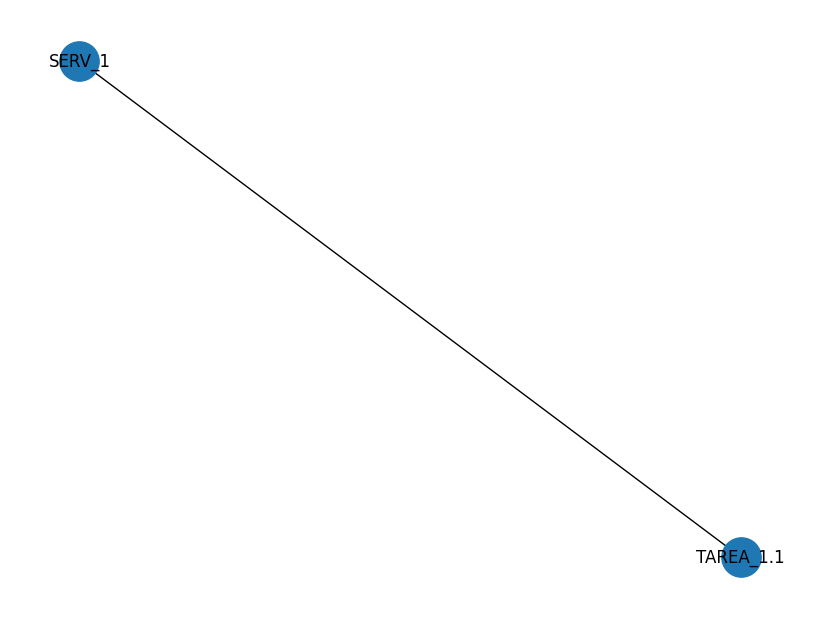

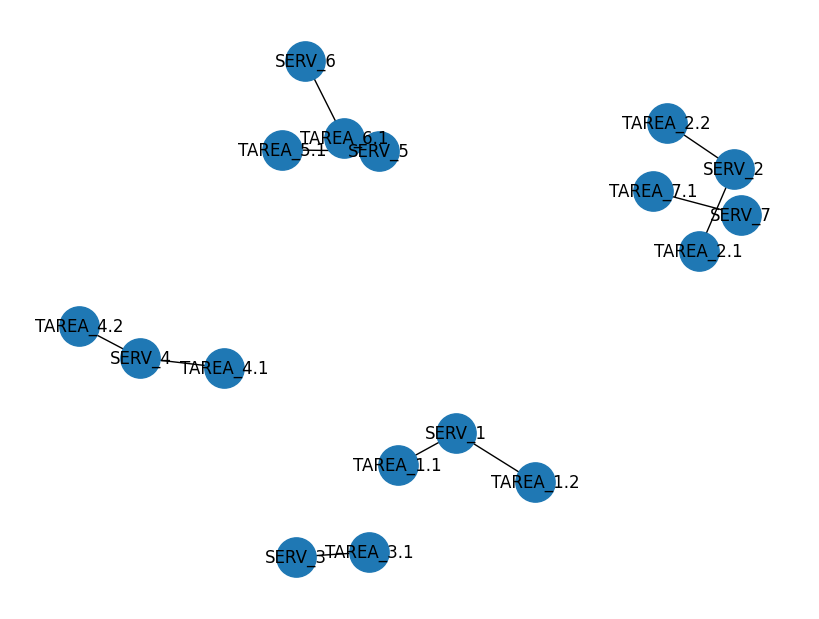

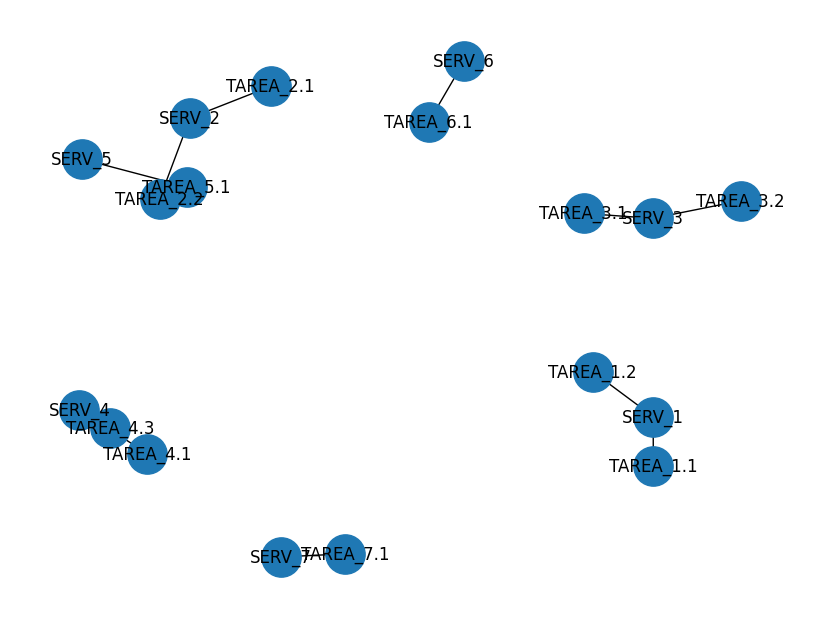

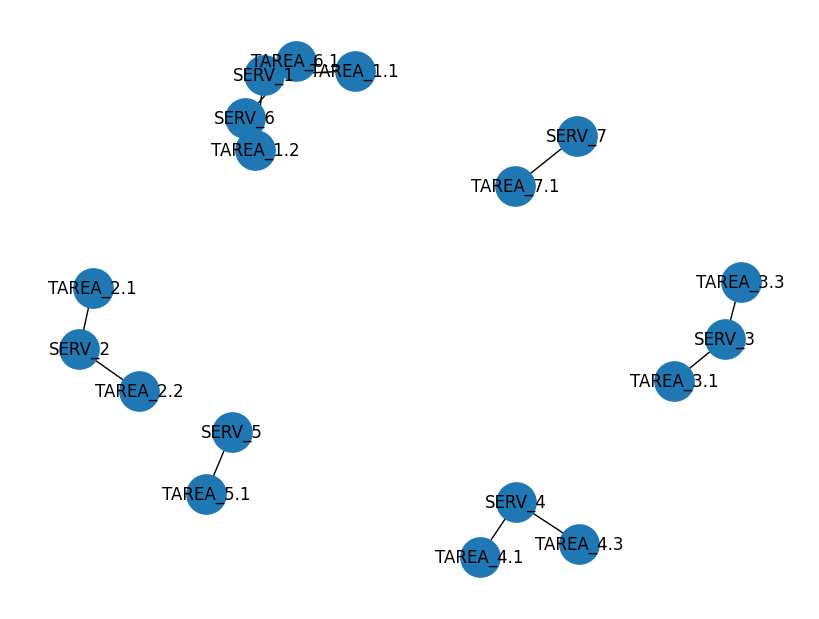

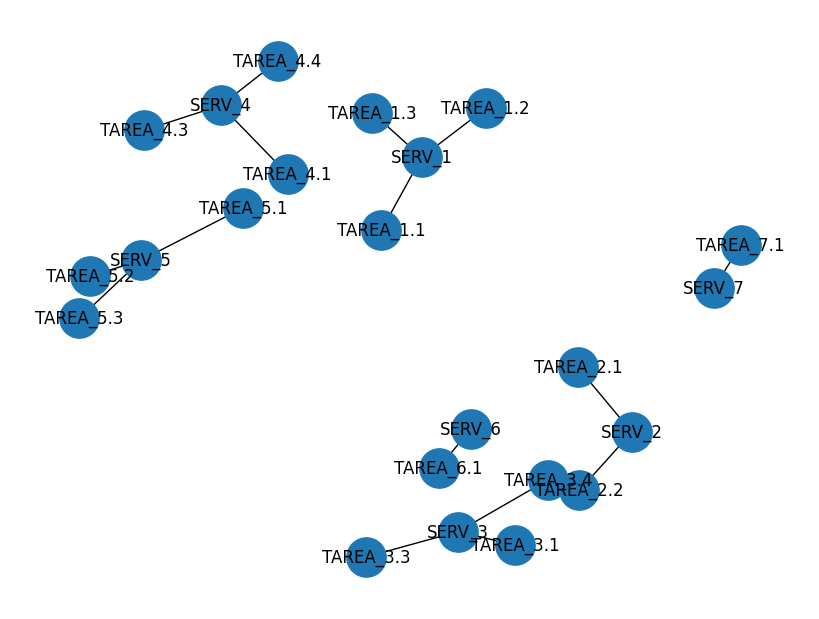

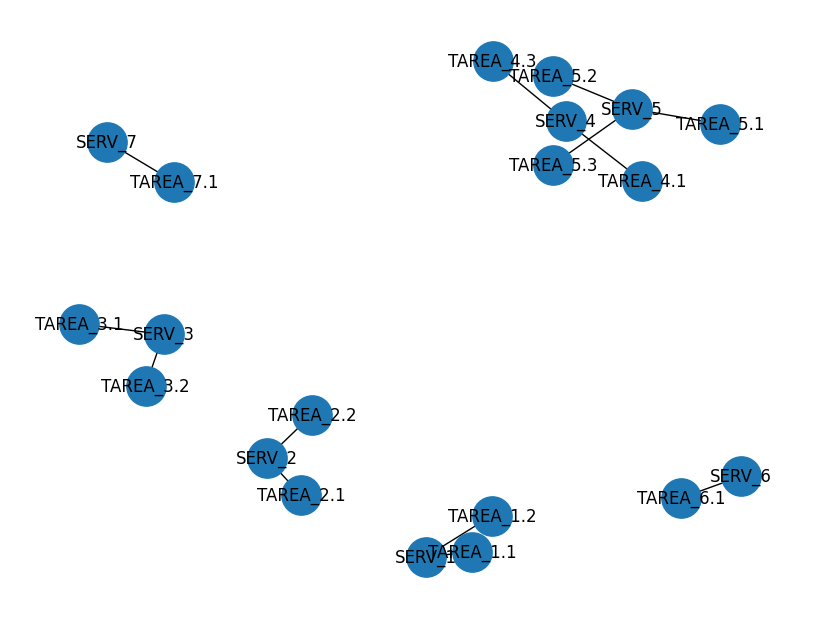

In [41]:
for year in graphs.keys():
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(graphs[year], seed=42, k=0.5)
    nx.draw(
        graphs[year], pos, with_labels=True, node_size= 800
    )
    plt.show()

In [42]:
from IPython.display import IFrame


net = Network(
    notebook=True,
    cdn_resources='in_line',
    select_menu = True,
    filter_menu = True
)

net.show_buttons()
net.from_nx(graphs[2020])
net.show('graph.html')
IFrame("graph.html", width=800, height=600)

graph.html
